<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/GenerativeAI_State_Space_Model_time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy: https://janelleturing.medium.com/advanced-time-series-analysis-state-space-models-and-kalman-filtering-3b7eb7157bf2

#State Space Models and Kalman Filtering in Python

- State-space models framework for **modeling time series data**


In [2]:
#i) Installing required libraries
!pip install numpy matplotlib

In [3]:
#ii) Importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [4]:
#iii) Generating Synthetic Data

np.random.seed(0)

# Define the number of time steps
T = 100

# Define the state transition matrix
F = np.array([[1]])

# Define the observation matrix
H = np.array([[1]])

# Define the process noise covariance
Q = np.array([[0.1]])

# Define the observation noise covariance
R = np.array([[1]])

# Define the initial state
x0 = np.array([0])

# Generate the true state and observations
x_true = np.zeros((T, 1))
y = np.zeros(T)

x_true[0] = x0
y[0] = H @ np.asarray(x_true[0]) + np.random.multivariate_normal(np.zeros((1,)), R)

for t in range(1, T):
    x_true[t] = F @ x_true[t-1] + np.random.multivariate_normal(np.zeros((1,)), Q)
    y[t] = H @ np.asarray(x_true[t]) + np.random.multivariate_normal(np.zeros((1,)), R)

<ipython-input-4-deffc0ab3a2e>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0] = H @ np.asarray(x_true[0]) + np.random.multivariate_normal(np.zeros((1,)), R)
<ipython-input-4-deffc0ab3a2e>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[t] = H @ np.asarray(x_true[t]) + np.random.multivariate_normal(np.zeros((1,)), R)


In [6]:
#iv) Implementing the Kalman filter

# Initialize the state estimate and covariance
x_hat = np.zeros((T, 1))
P = np.zeros((T, 1, 1))

x_hat[0] = x0
P[0] = Q

# Run the Kalman filter
for t in range(1, T):
    # Prediction step
    x_hat[t] = F @ x_hat[t-1]
    P[t] = F @ P[t-1] @ F.T + Q

    # Update step
    K = P[t] @ H.T @ np.linalg.inv(H @ P[t] @ H.T + R)
    x_hat[t] = x_hat[t] + K @ (y[t] - H @ x_hat[t])
    P[t] = (np.eye(1) - K @ H) @ P[t]

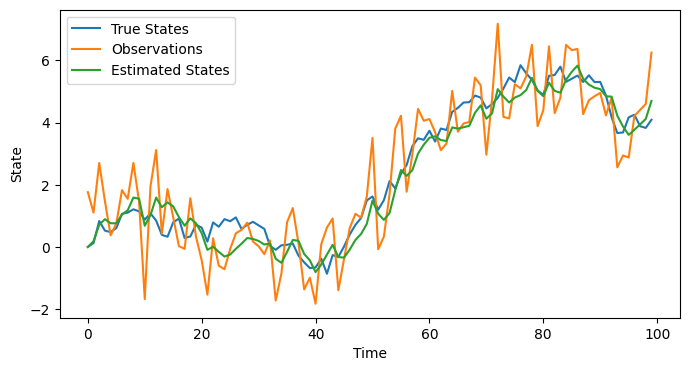

In [8]:
#v) Visualization the Results (Visualizing the true states) and estimated states using the Kalman filter

# Plot the true states, observations and estimated states
plt.figure(figsize=(8, 4))
plt.plot(range(T), x_true, label='True States')
plt.plot(range(T), y, label='Observations')
plt.plot(range(T), x_hat, label='Estimated States')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()

In [10]:
#Predicting the Stock Prices using State Space Models and Kalman Filtering

!pip install yfinance

import yfinance as yf

# Download stock price data
data = yf.download('JPM', start='2021-01-01', end='2023-10-10')

[*********************100%***********************]  1 of 1 completed


In [11]:
#Preprocessing the Data
# Compute log returns
data['Log Returns'] = np.log(data['Close']).diff()

# Remove missing values
data = data.dropna()

In [12]:
#Building the State Space Model

# Define the state transition matrix
F = np.array([[1]])

# Define the observation matrix
H = np.array([[1]])

# Define the process noise covariance
Q = np.array([[0.001]])

# Define the observation noise covariance
R = np.array([[0.01]])

# Define the initial state
x0 = np.array([0])

# Define the number of time steps
T = len(data)

# Generate the observations
y = data['Log Returns'].values.reshape(-1, 1)

In [13]:
#Estimating the States using the Kalman Filter

# Initialize the state estimate and covariance
x_hat = np.zeros((T, 1))
P = np.zeros((T, 1, 1))

x_hat[0] = x0
P[0] = Q

# Run the Kalman filter
for t in range(1, T):
    # Prediction step
    x_hat[t] = F @ x_hat[t-1]
    P[t] = F @ P[t-1] @ F.T + Q

    # Update step
    K = P[t] @ H.T @ np.linalg.inv(H @ P[t] @ H.T + R)
    x_hat[t] = x_hat[t] + K @ (y[t] - H @ x_hat[t])
    P[t] = (np.eye(1) - K @ H) @ P[t]

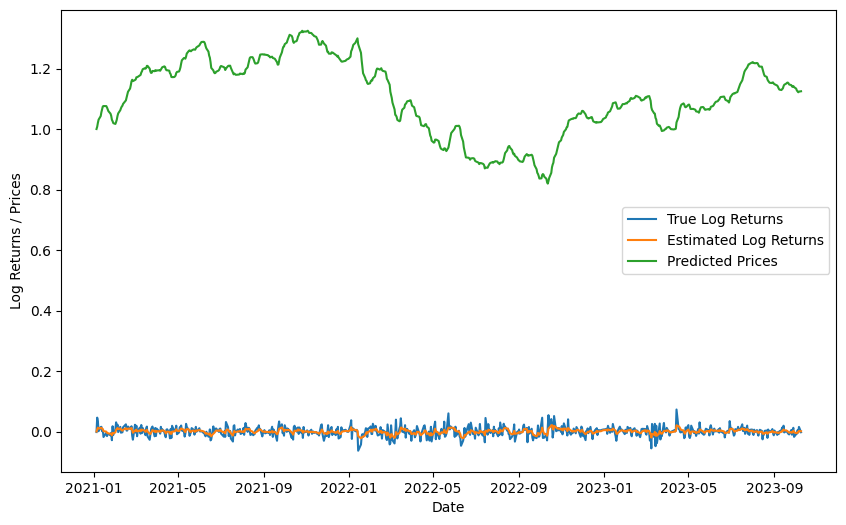

In [14]:
#Visualizing the Results

# Compute the estimated log returns
log_returns_hat = x_hat.flatten()

# Compute the predicted stock prices
prices_hat = np.exp(np.cumsum(log_returns_hat))

# Plot the true log returns, estimated log returns and predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Log Returns'], label='True Log Returns')
plt.plot(data.index, log_returns_hat, label='Estimated Log Returns')
plt.plot(data.index, prices_hat, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns / Prices')
plt.legend()
plt.show()

Courtesy: https://medium.com/@HeCanThink/the-state-space-odyssey-an-introduction-to-state-space-modeling-in-statistics-248bc056035f

#The State Space Odyssey: An Introduction to State Space Modeling in Statistics
Y_t = Z_t * alpha_t + epsilon_t
alpha_t = T_t * alpha_{t-1} + R_t * eta_t

- State Space Model in python using the state
smodels library

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -153.389
Date:                Sun, 06 Oct 2024   AIC                            314.777
Time:                        17:04:39   BIC                            325.198
Sample:                             0   HQIC                           318.995
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x             -0.0198      0.123     -0.160      0.873      -0.262       0.222
ar.L1          0.0127      0.099      0.127      0.899      -0.182       0.207
sigma2         1.2742      0.219      5.819      0.0

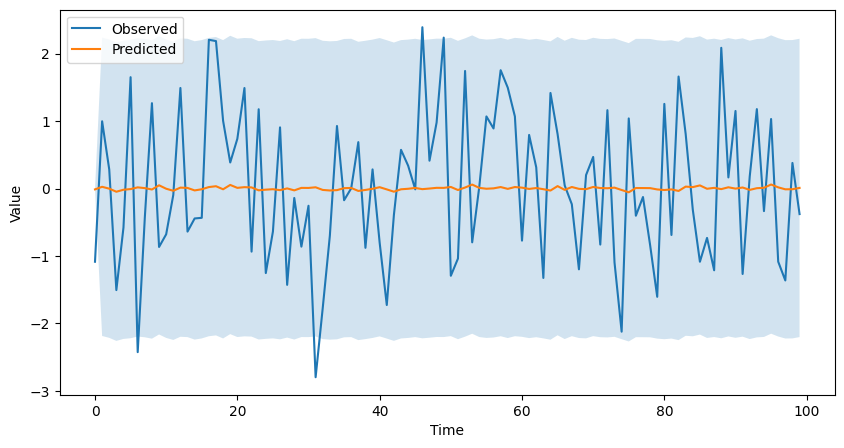

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a sample dataset
np.random.seed(123)
n = 100
y = np.random.normal(0, 1, n)
x = np.random.normal(0, 1, n)
df = pd.DataFrame({'y': y, 'x': x})

# Define the state space model
mod = sm.tsa.statespace.SARIMAX(df['y'], exog=df['x'], order=(1,0,0), seasonal_order=(0,0,0,0), initialization='diffuse')

# Fit the model
res = mod.fit()

# Print the summary of the model
print(res.summary())

# Make predictions
pred = res.get_prediction(start=0, end=n-1, exog=df['x'])
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# Plot the results
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['y'], label='Observed')
ax.plot(df.index, pred_mean, label='Predicted')
ax.fill_between(df.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], alpha=0.2)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()

#A Visual Guide to Mamba and State Space Models

https://newsletter.maartengrootendorst.com/p/a-visual-guide-to-mamba-and-state

Courtesy: https://github.com/badripatro/mamba360/blob/main/images/models.jpg

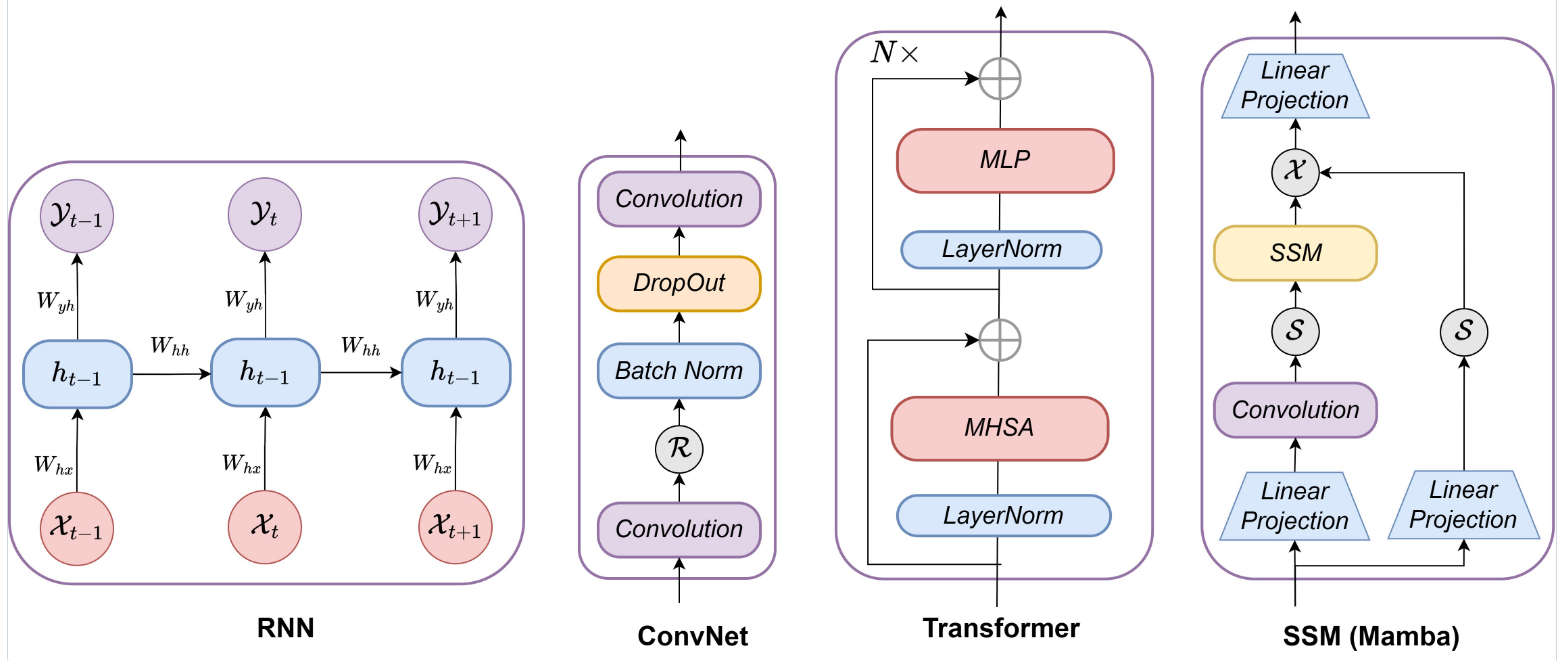

#Mamba: SSM, Theory, and Implementation in Keras and TensorFlow

####Understanding how SSMs and Mamba work, along with how to get started with implementing it in Keras and TensorFlow.




Courtesy: https://towardsdatascience.com/mamba-ssm-theory-and-implementation-in-keras-and-tensorflow-32d6d4b32546







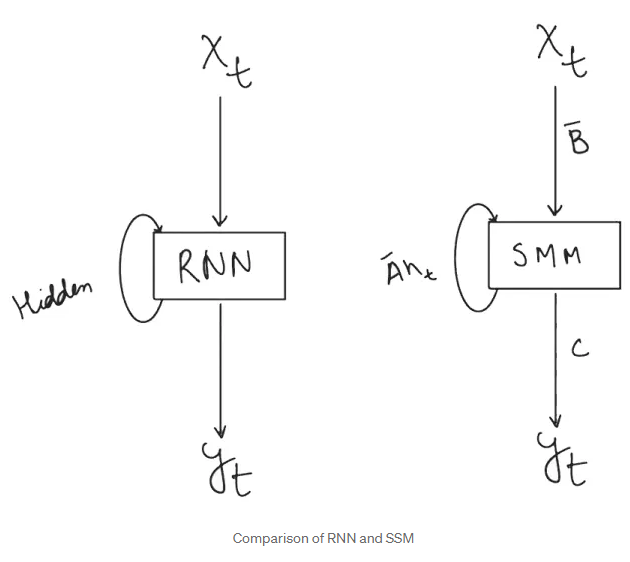

In [27]:
#Mamba-TF

import tensorflow_datasets as tfds
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

In [30]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

  Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.4 MB/s eta 0:00:00
Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


In [32]:
# Delete 'keras' from global environment, if it has been used as a variable name
# if 'keras' in globals():
#     del keras
import tensorflow as tf

from tensorflow import keras
# Import 'layers' and 'Model' from 'keras' directly.
from tensorflow.keras import layers, Model
# You do not need to explicitly import 'keras' to use its submodules.
# It is automatically made available when you import 'tensorflow'.
from dataclasses import dataclass
from einops import rearrange, repeat
from typing import Union

from transformers import AutoTokenizer

import datasets
import math
import numpy as np

ModuleNotFoundError: No module named 'tensorflow.keras'

In [33]:
@dataclass
class ModelArgs:
    model_input_dims: int = 64
    model_states: int = 64
    projection_expand_factor: int = 2
    conv_kernel_size: int = 4
    delta_t_min: float = 0.001
    delta_t_max: float = 0.1
    delta_t_scale: float = 0.1
    delta_t_init_floor: float = 1e-4
    conv_use_bias: bool = True
    dense_use_bias: bool = False
    layer_id: int = -1
    seq_length: int = 128
    num_layers: int = 5
    dropout_rate: float = 0.2
    use_lm_head: float = False
    num_classes: int = None
    vocab_size: int = None
    final_activation = None
    loss:Union[str, keras.losses.Loss] = None
    optimizer: Union[str, keras.optimizers.Optimizer] = keras.optimizers.AdamW()
    metrics = ['accuracy']

    def __post_init__(self):
        self.model_internal_dim: int = int(self.projection_expand_factor * self.model_input_dims)

        self.delta_t_rank = math.ceil(self.model_input_dims/16)
        if self.layer_id == -1:
            self.layer_id = np.round(np.random.randint(0, 1000), 4)

        if self.vocab_size == None:
            raise ValueError("vocab size cannot be none")

        if self.use_lm_head:
            self.num_classes=self.vocab_size
        else:
            if self.num_classes == None:
                raise ValueError(f'num classes cannot be {self.num_classes}')

            if self.num_classes == 1:
                self.final_activation = 'sigmoid'
            else:
                self.final_activation = 'softmax'

        if self.loss == None:
            raise ValueError(f"loss cannot be {self.loss}")

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
vocab_size = tokenizer.vocab_size


NameError: name 'dataclass' is not defined

In [34]:
# Not used in the code, but can be used, working
class RMSNorm(layers.Layer):
    def __init__(self, d_model: int, eps: float=1e-5, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.eps = eps
        self.weight = tf.Variable(np.ones(d_model), dtype=tf.float32, trainable=True)

    def call(self, x):
        x = tf.math.reduce_mean(tf.math.pow(x, 2), axis=-1, keepdims=True)
        output = x * tf.math.rsqrt(x + self.eps) * self.weight
        return output

NameError: name 'layers' is not defined

In [35]:
def selective_scan(u, delta, A, B, C, D):
    dA = tf.einsum('bld,dn->bldn', delta, A) # first step of A_bar = exp(ΔA), i.e., ΔA
    dB_u = tf.einsum('bld,bld,bln->bldn', delta, u, B)

    dA_cumsum = tf.pad(
        dA[:, 1:], [[0, 0], [1, 1], [0, 0], [0, 0]])[:, 1:, :, :]

    dA_cumsum = tf.reverse(dA_cumsum, axis=[1])  # Flip along axis 1

    # Cumulative sum along all the input tokens, parallel prefix sum, calculates dA for all the input tokens parallely
    dA_cumsum = tf.math.cumsum(dA_cumsum, axis=1)
    dA_cumsum = tf.exp(dA_cumsum)  # second step of A_bar = exp(ΔA), i.e., exp(ΔA)

    dA_cumsum = tf.reverse(dA_cumsum, axis=[1])  # Flip back along axis 1

    x = dB_u * dA_cumsum
    x = tf.math.cumsum(x, axis=1)/(dA_cumsum + 1e-12) # 1e-12 to avoid division by 0

    y = tf.einsum('bldn,bln->bld', x, C)

    return y + u * D

In [36]:
class MambaBlock(layers.Layer):
    def __init__(self, modelargs: ModelArgs, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.args = modelargs
        args = modelargs

        self.in_projection = layers.Dense(
            args.model_internal_dim * 2,
            input_shape=(args.model_input_dims,),
            use_bias=False)

        self.conv1d = layers.Conv1D(
            filters=args.model_internal_dim,
            use_bias=args.conv_use_bias,
            kernel_size=args.conv_kernel_size,
            groups=args.model_internal_dim,
            data_format='channels_first',
            padding='causal'
        )

        # this layer takes in current token 'x' and outputs the input-specific Δ, B, C (according to S6)
        self.x_projection = layers.Dense(
            args.delta_t_rank + args.model_states * 2,
            use_bias=False)

        # this layer projects Δ from delta_t_rank to the mamba internal dimension
        self.delta_t_projection = layers.Dense(args.model_internal_dim,
                                               input_shape=(args.delta_t_rank,), use_bias=True)

        self.A = tf.Variable(repeat(
                tf.range(1, args.model_states+1, dtype=tf.float32),
                'n -> d n', d=args.model_internal_dim), trainable=False, dtype=tf.float32)
        self.A_log = tf.Variable(tf.math.log(self.A), trainable=True, dtype=tf.float32)

        self.D = tf.Variable(np.ones(args.model_internal_dim), dtype=tf.float32)

        self.out_projection = layers.Dense(
            args.model_input_dims,
            input_shape=(args.model_internal_dim,), use_bias=args.dense_use_bias)

    def call(self, x):
        """Mamba block forward. This looks the same as Figure 3 in Section 3.4 in the Mamba paper [1].

        Official Implementation:
            class Mamba, https://github.com/state-spaces/mamba/blob/main/mamba_ssm/modules/mamba_simple.py#L119
            mamba_inner_ref(), https://github.com/state-spaces/mamba/blob/main/mamba_ssm/ops/selective_scan_interface.py#L311

        """

        (batch_size, seq_len, dimension) = x.shape

        x_and_res = self.in_projection(x) # shape = (batch, seq_len, 2 * model_internal_dimension)
        (x, res) = tf.split(x_and_res,
                            [self.args.model_internal_dim, self.args.model_internal_dim], axis=-1)

        x = rearrange(x, 'b l d_in -> b d_in l')
        x = self.conv1d(x)[:, :, :seq_len]
        x = rearrange(x, 'b d_in l -> b l d_in')

        x = tf.nn.swish(x)
        y = self.ssm(x)
        y = y * tf.nn.swish(res) # right side of mamba block image
        return self.out_projection(y)

    def ssm(self, x):
        """Runs the SSM. See:
            - Algorithm 2 in Section 3.2 in the Mamba paper [1]
            - run_SSM(A, B, C, u) in The Annotated S4 [2]

        Official Implementation:
            mamba_inner_ref(), https://github.com/state-spaces/mamba/blob/main/mamba_ssm/ops/selective_scan_interface.py#L311

        """
        (d_in, n) = self.A_log.shape

        # Compute ∆ A B C D, the state space parameters.
        #     A, D are input independent (see Mamba paper [1] Section 3.5.2 "Interpretation of A" for why A isn't selective)
        #     ∆, B, C are input-dependent (this is a key difference between Mamba and the linear time invariant S4,
        #                                  and is why Mamba is called **selective** state spaces)

        A = -tf.exp(tf.cast(self.A_log, tf.float32)) # shape -> (d_in, n)
        D = tf.cast(self.D, tf.float32)

        x_dbl = self.x_projection(x) # shape -> (batch, seq_len, delta_t_rank + 2*n)


        (delta, B, C) = tf.split(
            x_dbl,
            num_or_size_splits=[self.args.delta_t_rank, n, n],
            axis=-1) # delta.shape -> (batch, seq_len) & B, C shape -> (batch, seq_len, n)

        delta = tf.nn.softplus(
            self.delta_t_projection( delta)) # shape -> (batch, seq_len, model_input_dim)

        return selective_scan(x, delta, A, B, C, D)

NameError: name 'layers' is not defined

In [37]:
class ResidualBlock(layers.Layer):
    def __init__(self, modelargs: ModelArgs, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.args = modelargs
        args = modelargs

        self.mixer = MambaBlock(args)
        # self.norm = RMSNorm(args.model_input_dims)
        self.norm = layers.LayerNormalization(epsilon=1e-5)

    def call(self, x):
        """
        Official Implementation:
            Block.forward(), https://github.com/state-spaces/mamba/blob/main/mamba_ssm/modules/mamba_simple.py#L297

            Note: the official repo chains residual blocks that look like
                [Add -> Norm -> Mamba] -> [Add -> Norm -> Mamba] -> [Add -> Norm -> Mamba] -> ...
            where the first Add is a no-op. This is purely for performance reasons as this
            allows them to fuse the Add->Norm.

            We instead implement our blocks as the more familiar, simpler, and numerically equivalent
                [Norm -> Mamba -> Add] -> [Norm -> Mamba -> Add] -> [Norm -> Mamba -> Add] -> ....

        """
        return self.mixer(self.norm(x)) + x

NameError: name 'layers' is not defined

In [38]:
def init_model(args: ModelArgs):
    input_layer = layers.Input(shape=(args.seq_length,), name='input_ids')
    x = layers.Embedding(args.vocab_size, args.model_input_dims, input_length=args.seq_length)(input_layer)

    for i in range(args.num_layers):
        x = ResidualBlock(args, name=f"Residual_{i}")(x)
        x = layers.Dropout(args.dropout_rate)(x)

    x = layers.LayerNormalization(epsilon=1e-5)(x)

    if not args.use_lm_head: # use flatten only if we are using the model as an LM
        x = layers.Flatten()(x)
    x = layers.Dense(1024, activation=tf.nn.gelu)(x)
    output_layer = layers.Dense(args.num_classes, activation=args.final_activation)(x)

    model = Model(inputs=input_layer, outputs=output_layer, name='Mamba_ka_Mamba')
    model.compile(
        loss=args.loss,
        optimizer=args.optimizer,
        metrics=args.metrics
    )

    return model

NameError: name 'ModelArgs' is not defined

In [39]:
from datasets import load_dataset
from tqdm import tqdm

dataset = load_dataset("ajaykarthick/imdb-movie-reviews")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [40]:
args = ModelArgs(
    model_input_dims=128,
    model_states=32,
    num_layers=12,
    dropout_rate=0.2,
    vocab_size=vocab_size,
    num_classes=1,
    loss='binary_crossentropy',
)
model = init_model(args)
model.summary()

NameError: name 'ModelArgs' is not defined

In [41]:
train_labels, test_labels = [], []
train_ids = np.zeros((len(dataset['train']), args.seq_length))
test_ids = np.zeros((len(dataset['test']), args.seq_length))

for i, item in enumerate(tqdm(dataset['train'])):
    text = item['review']
    train_ids[i, :] = tokenizer.encode_plus(text, max_length=args.seq_length, padding='max_length', return_tensors='np')['input_ids'][0][:args.seq_length]
    train_labels.append(item['label'])

for i, item in enumerate(tqdm(dataset['test'])):
    text = item['review']
    test_ids[i, :] = tokenizer.encode_plus(text, max_length=args.seq_length, padding='max_length', return_tensors='np')['input_ids'][0][:args.seq_length]
    test_labels.append(item['label'])
del dataset

NameError: name 'args' is not defined

In [42]:
BATCH_SIZE = 16
train_dataset = tf.data.Dataset.from_tensor_slices((train_ids, train_labels)).batch(BATCH_SIZE).shuffle(1000)
test_dataset = tf.data.Dataset.from_tensor_slices((test_ids, test_labels)).batch(BATCH_SIZE).shuffle(1000)
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)
def infer(text: str, model: Model, tokenizer):
    tokens = tokenizer.encode(text, max_length=args.seq_length, padding='max_length', return_tensors='np')
    output = model(tokens)[-1, 0]
    return output

print(infer("Hello what is up"))

NameError: name 'train_ids' is not defined